# Порівняння метрик якості бінарної класифікації
## Programming Assignment

У цьому завданні ми розберемося, в чому полягає різниця між різними метриками якості. Ми зупинимося на завданні бінарної класифікації (з відгуками 0 і 1), але розглянемо її як завдання передбачення ймовірності того, що об'єкт належить класу 1. Таким чином, ми будемо працювати з дійсною, а не бінарної цільової змінної.

Завдання оформлено в стилі демонстрації з елементами Programming Assignment. Вам потрібно запустити вже написаний код і розглянути запропоновані графіки, а також реалізувати кілька своїх функцій. Для перевірки запишіть в окремі файли результати роботи цих функцій на зазначених наборах вхідних даних, це можна зробити за допомогою запропонованих в завданнях функцій write_answer_N, N - номер завдання. 

Для побудови графіків потрібно імпортувати відповідні модулі.
Бібліотека seaborn дозволяє зробити графіки красивіше. Якщо ви не хочете її використовувати, закоментуйте третій рядок.
Більш того, для виконання Programming Assignment модулі matplotlib і seaborn не потрібні (ви можете не запускати комірки з побудовою графіків і дивитися на вже побудовані картинки).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

### Що прогнозують  алгоритми

Для обчислення метрик якості в навчанні з учителем треба знати тільки два вектора: вектор правильних відповідей і вектор передбачених величин; будемо позначати їх actual і predicted. Вектор actual відомий з навчальної вибірки, вектор predicted повертається алгоритмом передбачення. Сьогодні ми не будемо використовувати якісь алгоритми класифікації, а просто розглянемо різні вектори передбачень.

В нашій формулюванні actual складається з нулів і одиниць, а predicted - з величин з інтервалу [0, 1] (ймовірності класу 1). Такі вектори зручно показувати на scatter plot.

Щоб зробити фінальний прогноз (вже бінарний), потрібно встановити поріг T: всі об'єкти, що мають прогноз  вище порога, відносять до класу 1, решта - до класу 0.

In [2]:
# рисуемо один scatter plot
def scatter(actual, predicted, T):
    plt.scatter(actual, predicted)
    plt.xlabel("Labels")
    plt.ylabel("Predicted probabilities")
    plt.plot([-0.2, 1.2], [T, T])
    plt.axis([-0.1, 1.1, -0.1, 1.1])
    
# рисуемо декілька scatter plot в таблиці, яка має розміри  shape
def many_scatters(actuals, predicteds, Ts, titles, shape):
    plt.figure(figsize=(shape[1]*5, shape[0]*5))
    i = 1
    for actual, predicted, T, title in zip(actuals, predicteds, Ts, titles):
        ax = plt.subplot(shape[0], shape[1], i)
        ax.set_title(title)
        i += 1
        scatter(actual, predicted, T)

Ідеальна ситуація: існує поріг T, вірно розділяє ймовірності, що відповідають двом класам. Приклад такої ситуації:

In [3]:
actual_0 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  
          1.,  1.,  1., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_0 = np.array([ 0.19015288,  0.23872404,  0.42707312,  0.15308362,  0.2951875 ,
            0.23475641,  0.17882447,  0.36320878,  0.33505476,  0.202608  ,
            0.82044786,  0.69750253,  0.60272784,  0.9032949 ,  0.86949819,
            0.97368264,  0.97289232,  0.75356512,  0.65189193,  0.95237033,
            0.91529693,  0.8458463 ])

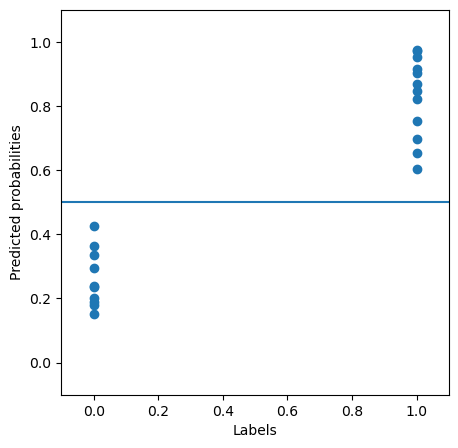

In [4]:
plt.figure(figsize=(5, 5))
scatter(actual_0, predicted_0, 0.5)

Інтервали ймовірностей для двох класів чудово поділяються порогом T = 0.5.

Найчастіше інтервали накладаються - тоді потрібно акуратно підбирати поріг.

Самий неправильний алгоритм робить все навпаки: піднімає ймовірності класу 0 вище ймовірностей класу 1. Якщо так сталося, варто подивитися, чи не переплуталися мітки 0 і 1 при створенні цільового вектора з сирих даних.

приклади:

In [5]:
actual_1 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                    0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
                    1.,  1.,  1.,  1.])
predicted_1 = np.array([ 0.41310733,  0.43739138,  0.22346525,  0.46746017,  0.58251177,
            0.38989541,  0.43634826,  0.32329726,  0.01114812,  0.41623557,
            0.54875741,  0.48526472,  0.21747683,  0.05069586,  0.16438548,
            0.68721238,  0.72062154,  0.90268312,  0.46486043,  0.99656541,
            0.59919345,  0.53818659,  0.8037637 ,  0.272277  ,  0.87428626,
            0.79721372,  0.62506539,  0.63010277,  0.35276217,  0.56775664])
actual_2 = np.array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
predicted_2 = np.array([ 0.07058193,  0.57877375,  0.42453249,  0.56562439,  0.13372737,
            0.18696826,  0.09037209,  0.12609756,  0.14047683,  0.06210359,
            0.36812596,  0.22277266,  0.79974381,  0.94843878,  0.4742684 ,
            0.80825366,  0.83569563,  0.45621915,  0.79364286,  0.82181152,
            0.44531285,  0.65245348,  0.69884206,  0.69455127])

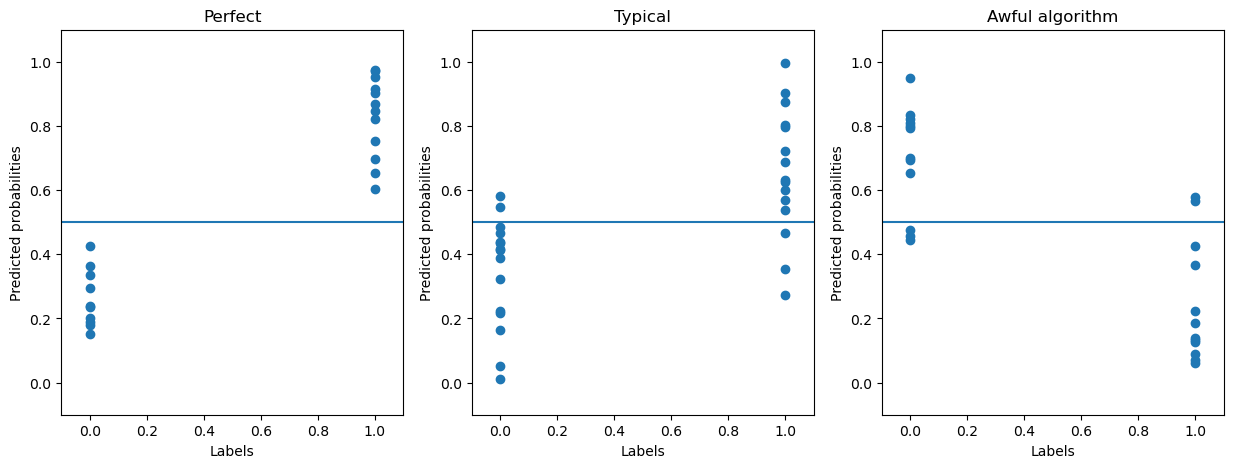

In [6]:
many_scatters([actual_0, actual_1, actual_2], [predicted_0, predicted_1, predicted_2], 
              [0.5, 0.5, 0.5], ["Perfect", "Typical", "Awful algorithm"], (1, 3))

Алгоритм може бути обережним і прагнути сильно не відхиляти ймовірності від 0.5, а може ризикувати - будувати припущення близакими до нуля або одиниці.

In [7]:
# ризикований ідеальний алгоритм
actual_0r = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
            1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_0r = np.array([ 0.23563765,  0.16685597,  0.13718058,  0.35905335,  0.18498365,
            0.20730027,  0.14833803,  0.18841647,  0.01205882,  0.0101424 ,
            0.10170538,  0.94552901,  0.72007506,  0.75186747,  0.85893269,
            0.90517219,  0.97667347,  0.86346504,  0.72267683,  0.9130444 ,
            0.8319242 ,  0.9578879 ,  0.89448939,  0.76379055])
# ризикований гарний алгоритм
actual_1r = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
            1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_1r = np.array([ 0.13832748,  0.0814398 ,  0.16136633,  0.11766141,  0.31784942,
            0.14886991,  0.22664977,  0.07735617,  0.07071879,  0.92146468,
            0.87579938,  0.97561838,  0.75638872,  0.89900957,  0.93760969,
            0.92708013,  0.82003675,  0.85833438,  0.67371118,  0.82115125,
            0.87560984,  0.77832734,  0.7593189,  0.81615662,  0.11906964,
            0.18857729])

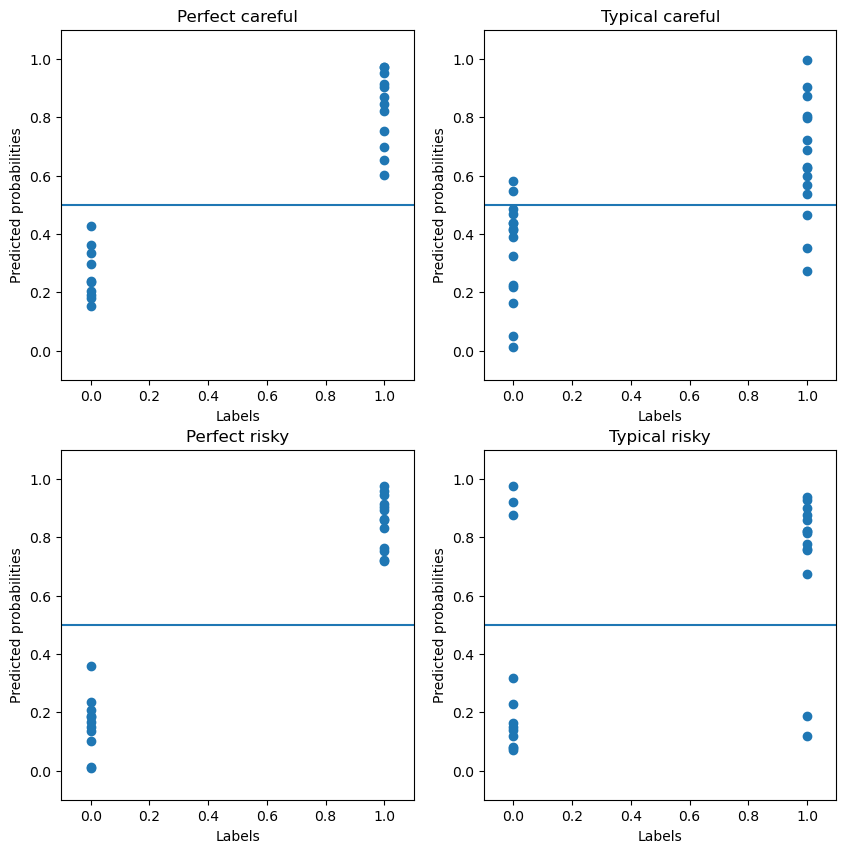

In [8]:
many_scatters([actual_0, actual_1, actual_0r, actual_1r], 
              [predicted_0, predicted_1, predicted_0r, predicted_1r], 
              [0.5, 0.5, 0.5, 0.5],
              ["Perfect careful", "Typical careful", "Perfect risky", "Typical risky"], 
              (2, 2))

Також інтервали можуть зміщуватися. Якщо алгоритм боїться помилок false positive, то він буде частіше будувати припущення, близькі до нуля.
Аналогічно, щоб уникнути помилок false negative, логічно частіше передбачати великі ймовірності.

In [9]:
actual_10 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
                1.,  1.,  1.])
predicted_10 = np.array([ 0.29340574, 0.47340035,  0.1580356 ,  0.29996772,  0.24115457,  0.16177793,
                         0.35552878,  0.18867804,  0.38141962,  0.20367392,  0.26418924, 0.16289102, 
                         0.27774892,  0.32013135,  0.13453541, 0.39478755,  0.96625033,  0.47683139,  
                         0.51221325,  0.48938235, 0.57092593,  0.21856972,  0.62773859,  0.90454639,  0.19406537,
                         0.32063043,  0.4545493 ,  0.57574841,  0.55847795 ])
actual_11 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_11 = np.array([ 0.35929566, 0.61562123,  0.71974688,  0.24893298,  0.19056711,  0.89308488,
            0.71155538,  0.00903258,  0.51950535,  0.72153302,  0.45936068,  0.20197229,  0.67092724,
                         0.81111343,  0.65359427,  0.70044585,  0.61983513,  0.84716577,  0.8512387 ,  
                         0.86023125,  0.7659328 ,  0.70362246,  0.70127618,  0.8578749 ,  0.83641841,  
                         0.62959491,  0.90445368])

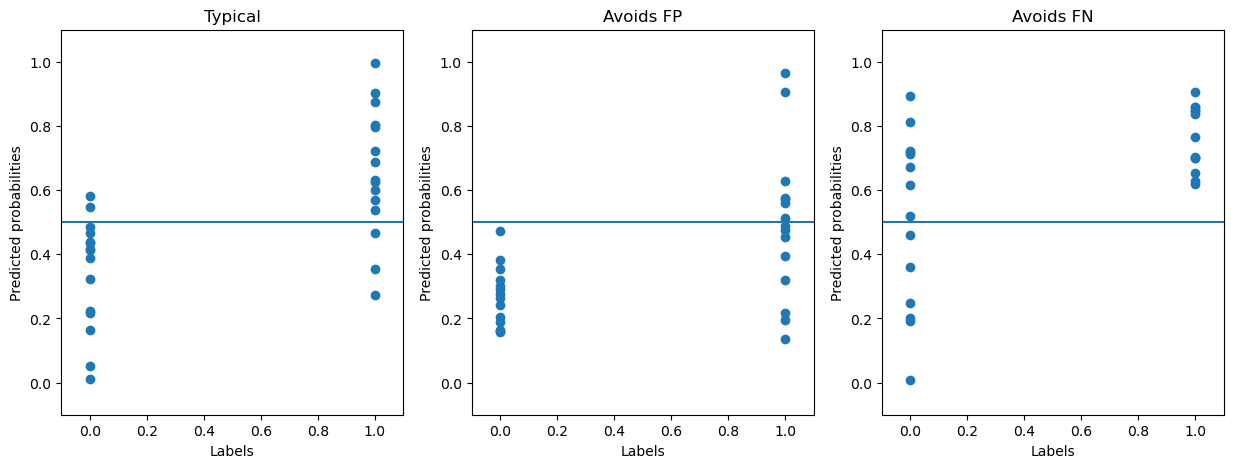

In [10]:
many_scatters([actual_1, actual_10, actual_11], [predicted_1, predicted_10, predicted_11], 
              [0.5, 0.5, 0.5], ["Typical", "Avoids FP", "Avoids FN"], (1, 3))

Ми описали різні характери векторів ймовірностей. Далі ми будемо дивитися, як метрики оцінюють різні вектори прогнозів, тому обов'язково виконайте комірки, що створюють вектори для візуалізації.

### Метрики, що оцінюють бінарні вектори прогнозів

Є дві типові ситуації, коли фахівці з машинного навчання починають вивчати характеристики метрик якості:
1. коли приймають участь в змаганні або вирішенні прикладної задачі, коли вектор прогнозів оцінюється за конкретною метрицею, і коли потрібно побудувати алгоритм, який максимізує цю метрику.
1. на етапі формалізації завдання машинного навчання, коли є вимоги прикладної області, і потрібно запропонувати математичну метрику, яка буде відповідати цим вимогам.

Далі ми коротко розглянемо кожну метрику з цих двох позицій.

#### Precision и recall; accuracy

Для початку розберемося з метриками, які оцінюють якість вже після бинаризации по порогу T, тобто порівнюють два бінарних вектора: actual і predicted.

Дві популярні метрики - precision і recall. Перша показує, як часто алгоритм прогнозує  клас 1 і виявляється правим, а друга - як багато об'єктів класу 1 алгоритм знайшов.

Також розглянемо найпростішу і відому метрику - accuracy; вона показує частку правильних відповідей.

З'ясуємо переваги і недоліки цих метрик, використавши  їх на різних векторах ймовірностей.

In [11]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [12]:
T = 0.5
print("Алгоритми, разні за якістю:")
for actual, predicted, descr in zip([actual_0, actual_1, actual_2], 
                                    [predicted_0 > T, predicted_1 > T, predicted_2 > T],
                                    ["Perfect:", "Typical:", "Awful:"]):
    print(descr, "precision =", precision_score(actual, predicted), "recall =", \
        recall_score(actual, predicted), ";",\
        "accuracy =", accuracy_score(actual, predicted))
print()
print("Обережний та ризикований алгоритми:")
for actual, predicted, descr in zip([actual_1, actual_1r], 
                                    [predicted_1 > T, predicted_1r > T],
                                    ["Typical careful:", "Typical risky:"]):
    print(descr, "precision =", precision_score(actual, predicted), "recall =", \
        recall_score(actual, predicted), ";",\
        "accuracy =", accuracy_score(actual, predicted))
print()
print("Різні схильності алгоритмів до помилок FP и FN:")
for actual, predicted, descr in zip([actual_10, actual_11], 
                                    [predicted_10 > T, predicted_11 > T], 
                                    ["Avoids FP:", "Avoids FN:"]):
    print(descr, "precision =", precision_score(actual, predicted), "recall =", \
        recall_score(actual, predicted), ";",\
        "accuracy =", accuracy_score(actual, predicted))

Алгоритми, разні за якістю:
Perfect: precision = 1.0 recall = 1.0 ; accuracy = 1.0
Typical: precision = 0.8571428571428571 recall = 0.8 ; accuracy = 0.8333333333333334
Awful: precision = 0.18181818181818182 recall = 0.16666666666666666 ; accuracy = 0.20833333333333334

Обережний та ризикований алгоритми:
Typical careful: precision = 0.8571428571428571 recall = 0.8 ; accuracy = 0.8333333333333334
Typical risky: precision = 0.8 recall = 0.8571428571428571 ; accuracy = 0.8076923076923077

Різні схильності алгоритмів до помилок FP и FN:
Avoids FP: precision = 1.0 recall = 0.4666666666666667 ; accuracy = 0.7241379310344828
Avoids FN: precision = 0.6190476190476191 recall = 1.0 ; accuracy = 0.7037037037037037


Всі три метрики легко розрізняють прості випадки гарних і поганих алгоритмів. Звернемо увагу, що метрики мають область значень [0, 1], і тому їх легко інтерпретувати.

Метрикам не важливі величини ймовірностей, їм важливо лише те, скільки об'єктів неправильно зайшли за встановлену межу (в даному випадку T = 0.5).

Метрика accuracy дає однакову вагу помилок false positive і false negative, зате пара метрик precision і recall однозначно ідентифікує цю різницю. Власне, їх для того і використовують, щоб контролювати помилки FP і FN.

Ми виміряли три метрики, фіксований поріг T = 0.5, тому що для багатьох картинок він здається оптимальним. Давайте подивимося на останній (найцікавішою для цих метрик) групі векторів, як змінюються precision і recall при збільшенні порога.

In [13]:
from sklearn.metrics import precision_recall_curve

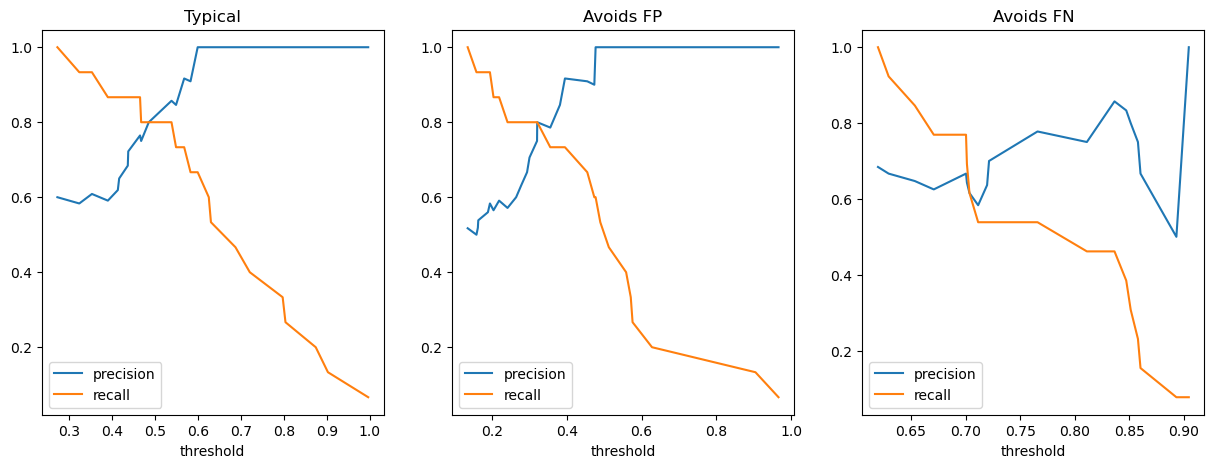

In [14]:
precs = []
recs = []
threshs = []
labels = ["Typical", "Avoids FP", "Avoids FN"]
for actual, predicted in zip([actual_1, actual_10, actual_11], 
                                    [predicted_1, predicted_10, predicted_11]):
    prec, rec, thresh = precision_recall_curve(actual, predicted)
    precs.append(prec)
    recs.append(rec)
    threshs.append(thresh)
plt.figure(figsize=(15, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    plt.plot(threshs[i], precs[i][:-1], label="precision")
    plt.plot(threshs[i], recs[i][:-1], label="recall")
    plt.xlabel("threshold")
    ax.set_title(labels[i])
    plt.legend()

При збільшенні порога ми робимо менше помилок FP і більше помилок FN, тому одна з кривих зростає, а друга - падає. За таким графіком можна підібрати оптимальне значення порога, при якому precision і recall будуть прийнятні. Якщо такого порогу не знайшлося, потрібно навчати інший алгоритм.

Обмовимося, що прийнятні значення precision і recall визначаються предметною областю. Наприклад, в задачі визначення, хворий пацієнт певну хворобу (0 - здоровий, 1 - хворий), помилок false negative намагаються уникати, вимагаючи recall близько 0.9. Можна сказати людині, що він хворий, і при подальшій діагностиці виявити помилку; набагато гірше пропустити наявність хвороби.

__<font color="green" size=5>Programming assignment: problem 1. </font>__ Фіксуємо поріг T = 0.65; за графіками можна приблизно дізнатися, чому дорівнюють метрики на трьох обраних парах векторів (actual, predicted). Обчисліть точні precision і recall для цих трьох пар векторів.

6 отриманих чисел запишіть в текстовий файл в такому порядку:

precision_1 recall_1 precision_10 recall_10 precision_11 recall_11

Цифри XXX після пропуску відповідають таким же цифрам в назвах змінних actual_XXX і predicted_XXX.

Передайте відповідь в функцію write_answer_1.

In [15]:
############### Programming assignment: problem 1 ###############
T = 0.65
print("T = 0.65:")
for actual, predicted, descr in zip([actual_1, actual_10, actual_11], 
                                    [predicted_1 > T, predicted_10 > T, predicted_11 > T],
                                    [" _1:", "_10:", "_11:"]):
    print(descr, "precision =", precision_score(actual, predicted), "recall =", \
        recall_score(actual, predicted))

T = 0.65:
 _1: precision = 1.0 recall = 0.4666666666666667
_10: precision = 1.0 recall = 0.13333333333333333
_11: precision = 0.6470588235294118 recall = 0.8461538461538461


In [16]:
precision_1, recall_1 = 1.0, 0.4666666666666667
precision_10, recall_10 = 1.0, 0.13333333333333333
precision_11, recall_11 = 0.6470588235294118, 0.8461538461538461

In [17]:
def write_answer_1(precision_1, recall_1, precision_10, recall_10, precision_11, recall_11):
    answers = [precision_1, recall_1, precision_10, recall_10, precision_11, recall_11]
    with open("pa_metrics_problem1.txt", "w") as fout:
        fout.writelines(" ".join([str(num) for num in answers])+'\n')
        fout.writelines('сума чисел: '+ str(round(sum(answers),5)))
        print(answers)
        print('сума чисел: '+ str(round(sum(answers),5)))
               
write_answer_1(precision_1, recall_1, precision_10, recall_10, precision_11, recall_11)

[1.0, 0.4666666666666667, 1.0, 0.13333333333333333, 0.6470588235294118, 0.8461538461538461]
сума чисел: 4.09321


#### F1-score

Очевидний недолік пари метрик precision-recall - в тому, що їх дві: незрозуміло, як ранжувати алгоритми. Щоб цього уникнути, використовують F1-метрику, яка дорівнює середньому гармонійному precision і recall.
F1-метрика буде дорівнює 1, якщо і тільки якщо precision = 1 і recall = 1 (ідеальний алгоритм).

(: Обдурити F1 складно: якщо одна з величин маленька, а інша близька до 1 (за графіками видно, що таке співвідношення іноді легко отримати), F1 буде далека від 1. F1-метрику складно оптимізувати, тому що для цього потрібно вимагати більшої повноти і точності одночасно.

Наприклад, порахуємо F1 для того ж набору векторів, для якого ми будували графіки (ми пам'ятаємо, що там одна з кривих швидко виходить в одиницю).

In [18]:
from sklearn.metrics import f1_score

In [19]:
T = 0.5
print("Разні схильності алгоритмів до помилок FP и FN:")
for actual, predicted, descr in zip([actual_1, actual_10, actual_11], 
                                    [predicted_1 > T, predicted_10 > T, predicted_11 > T], 
                                    ["Typical:", "Avoids FP:", "Avoids FN:"]):
    print(descr, "f1 =", f1_score(actual, predicted))

Разні схильності алгоритмів до помилок FP и FN:
Typical: f1 = 0.8275862068965518
Avoids FP: f1 = 0.6363636363636364
Avoids FN: f1 = 0.7647058823529412


F1-метрика в двох останніх випадках, коли одна з парних метрик дорівнює 1, значно менше, ніж в першому, збалансованому випадку.

__<font color="green" size=5>Programming assignment: problem 2. </font>__  На precision і recall впливають і характер вектора ймовірностей, і встановлений поріг.
Для тих же пар (actual, predicted), що і в попередній задачі, знайдіть оптимальні пороги, максимізує F1_score. Будемо розглядати тільки пороги виду T = 0.1 * k, k - ціле; відповідно, потрібно знайти три значення k. Якщо f1 максимизируется при декількох значеннях k, вкажіть найменше з них.

Запишіть знайдені числа k в наступному порядку:

k_1, k_10, k_11

Цифри XXX після пропуску відповідають таким же цифрам в назвах змінних actual_XXX і predicted_XXX.

Передайте відповідь в функцію write_answer_2. Завантажте файл в форму.

Якщо ви запишіть список з трьох знайдених k в тому ж порядку в змінну ks, то за допомогою коду нижче можна візуалізувати знайдені пороги:

In [20]:
############### Programming assignment: problem 2 ###############

In [21]:
def find_f1_score(actual_, predicted_, XXX, T):
    for actual, predicted, descr in zip([actual_], 
                                    [predicted_ > T], 
                                    [XXX]):
        f1 = f1_score(actual, predicted)
        #print("_",descr,": " "f1 =", f1_score(actual, predicted))
    return f1

In [22]:
def find_ksi(actual_, predicted_, XXX, print_=True):
    T = np.zeros(11)
    f1 = np.zeros(11)
    for k in range(11):
        T[k] = round(0.1*k, 2)
        f1[k] = find_f1_score(actual_, predicted_, XXX, T[k])
        if (print_):
            print ("T = 0.1*k =",T[k], " f1 =",f1[k])

    max_f1 = max(f1)
    if (print_):
        print("max_f1 =", max_f1)
        print()
    
    k_ = np.argmax(f1)
    return k_

In [23]:
#k_1  = find_ksi(actual_1,  predicted_1, 1, False) # якщо записати False в кінці то проміжні розрахунки не будуть надруковані
k_1  = find_ksi(actual_1,  predicted_1, 1) 
k_10 = find_ksi(actual_10, predicted_10, 10)
k_11 = find_ksi(actual_11, predicted_11, 11)
print(k_1, k_10, k_11)

T = 0.1*k = 0.0  f1 = 0.6666666666666666
T = 0.1*k = 0.1  f1 = 0.6976744186046512
T = 0.1*k = 0.2  f1 = 0.7142857142857143
T = 0.1*k = 0.3  f1 = 0.7179487179487181
T = 0.1*k = 0.4  f1 = 0.7222222222222222
T = 0.1*k = 0.5  f1 = 0.8275862068965518
T = 0.1*k = 0.6  f1 = 0.7499999999999999
T = 0.1*k = 0.7  f1 = 0.5714285714285715
T = 0.1*k = 0.8  f1 = 0.4210526315789474
T = 0.1*k = 0.9  f1 = 0.23529411764705882
T = 0.1*k = 1.0  f1 = 0.0
max_f1 = 0.8275862068965518

T = 0.1*k = 0.0  f1 = 0.6818181818181819
T = 0.1*k = 0.1  f1 = 0.6818181818181819
T = 0.1*k = 0.2  f1 = 0.6842105263157895
T = 0.1*k = 0.3  f1 = 0.7741935483870969
T = 0.1*k = 0.4  f1 = 0.7692307692307692
T = 0.1*k = 0.5  f1 = 0.6363636363636364
T = 0.1*k = 0.6  f1 = 0.33333333333333337
T = 0.1*k = 0.7  f1 = 0.23529411764705882
T = 0.1*k = 0.8  f1 = 0.23529411764705882
T = 0.1*k = 0.9  f1 = 0.23529411764705882
T = 0.1*k = 1.0  f1 = 0.0
max_f1 = 0.7741935483870969

T = 0.1*k = 0.0  f1 = 0.65
T = 0.1*k = 0.1  f1 = 0.66666666666666

In [24]:
ks = [k_1, k_10, k_11]
ks

[5, 3, 6]

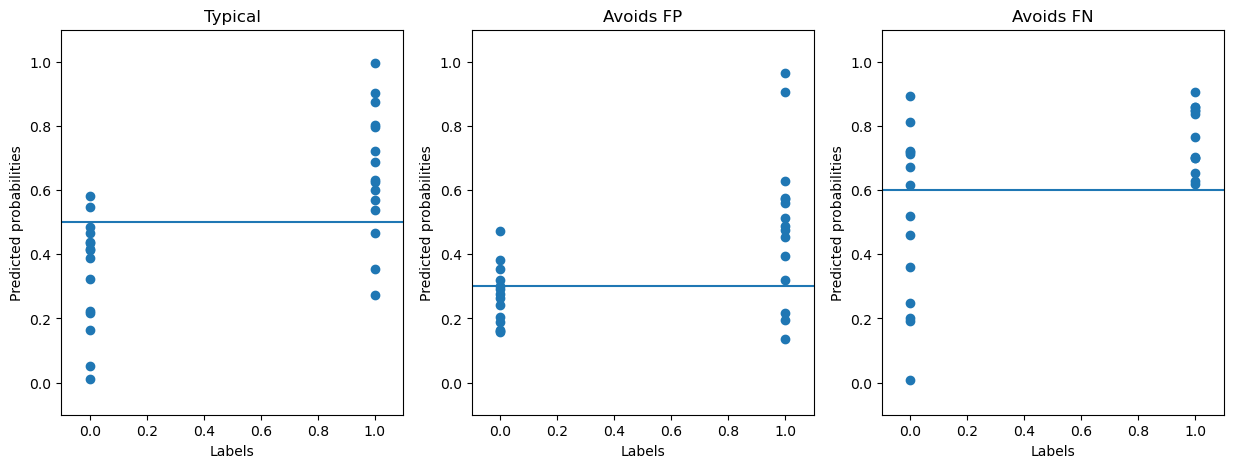

In [25]:
many_scatters([actual_1, actual_10, actual_11], [predicted_1, predicted_10, predicted_11], 
              np.array(ks)*0.1, ["Typical", "Avoids FP", "Avoids FN"], (1, 3))

In [26]:
def write_answer_2(k_1, k_10, k_11):
    answers = [k_1, k_10, k_11]
    with open("pa_metrics_problem2.txt", "w") as fout:
        fout.writelines(" ".join([str(num) for num in answers])+'\n')
        fout.writelines('сума чисел: '+ str(round(sum(answers),5)))
        print(answers)
        print('сума чисел: '+ str(round(sum(answers),5)))
        
write_answer_2(k_1, k_10, k_11)        

[5, 3, 6]
сума чисел: 14


### Метрики, що оцінюють вектори ймовірностей класу 1

Розглянуті метрики зручно інтерпретувати, але при їх використанні ми не враховуємо більшу частину інформації, отриманої від алгоритму. У деяких задачах ймовірності потрібні в чистому вигляді, наприклад, якщо ми передбачаємо, чи виграє команда в футбольному матчі, і величина ймовірності впливає на розмір ставки за цю команду. Навіть якщо в кінці кінців ми все одно бінарізуем пророкування, хочеться стежити за характером вектора ймовірності.

#### Log_loss

Log_loss обчислює правдоподібність міток в actual з можливостями з predicted, взяте з протилежним знаком:

$log\_loss(actual, predicted) = - \frac 1 n \sum_{i=1}^n (actual_i \cdot \log (predicted_i) + (1-actual_i) \cdot \log (1-predicted_i))$, $n$ - довжина векторів.

Відповідно, цю метрику потрібно мінімізувати.

Обчислимо її на наших векторах:

In [27]:
from sklearn.metrics import log_loss

In [28]:
print("Алгоритми, разні за якістю:")
for actual, predicted, descr in zip([actual_0, actual_1, actual_2], 
                                    [predicted_0, predicted_1, predicted_2],
                                    ["Perfect:", "Typical:", "Awful:"]):
    print(descr, log_loss(actual, predicted))
print()
print("Обережний та ризиковий алгоритми:")
for actual, predicted, descr in zip([actual_0, actual_0r, actual_1, actual_1r], 
                                    [predicted_0, predicted_0r, predicted_1, predicted_1r],
                                    ["Ideal careful", "Ideal risky", "Typical careful:", "Typical risky:"]):
    print(descr, log_loss(actual, predicted))
print()
print("Разні схильносты алгоритмам до похибок FP и FN:")
for actual, predicted, descr in zip([actual_10, actual_11], 
                                    [predicted_10, predicted_11], 
                                    ["Avoids FP:", "Avoids FN:"]):
    print(descr, log_loss(actual, predicted))

Алгоритми, разні за якістю:
Perfect: 0.24921263759186213
Typical: 0.4645068222557676
Awful: 1.5270248809234201

Обережний та ризиковий алгоритми:
Ideal careful 0.24921263759186213
Ideal risky 0.17061947914666056
Typical careful: 0.4645068222557676
Typical risky: 0.6138745922344455

Разні схильносты алгоритмам до похибок FP и FN:
Avoids FP: 0.5849339709893446
Avoids FN: 0.5886791288814904


Як і попередні метрики, log_loss добре розрізняє ідеальний, типовий і поганий випадки. Але зверніть увагу, що інтерпретувати величину досить складно: метрика не досягає нуля ніколи і не має верхньої межі. Тому навіть для ідеального алгоритму, якщо дивитися тільки на одне значення log_loss, неможливо зрозуміти, що він ідеальний.

Але зате ця метрика розрізняє обережний і готовий ризикувати алгоритми. Як ми бачили вище, у випадках Typical careful і Typical risky кількість помилок при бинаризации по T = 0.5 приблизно однакове, у випадках Ideal помилок взагалі немає. Однак за невдало вгадані класи в Typical ризик алгоритму доводиться платити великим збільшенням log_loss, ніж обережного алгоритму. З іншого боку, за вдало вгадані класи ризикований ідеальний алгоритм отримує менший log_loss, ніж обережний ідеальний алгоритм.

Таким чином, log_loss чутливий і до можливостям, близьким до 0 і 1, і до можливостям, близьким до 0.5.

Помилки FP і FN звичайний Log_loss розрізняти не вміє.

Однак неважко зробити узагальнення log_loss на випадок, коли потрібно більше штрафувати FP або FN: для цього досить додати опуклу (тобто неотрицательную і підсумовується до одиниці) комбінацію з двох коефіцієнтів до доданком правдоподібності. Наприклад, давайте штрафувати false positive:

$weighted\_log\_loss(actual, predicted) = -\frac 1 n \sum_{i=1}^n (0.3\, \cdot actual_i \cdot \log (predicted_i) + 0.7\,\cdot (1-actual_i)\cdot \log (1-predicted_i))$

Якщо алгоритм невірно пророкує велику ймовірність першого класу, тобто об'єкт насправді належить класу 0, то перший доданок в дужках дорівнює нулю, а друге враховується з великою вагою.

__<font color="green" size=5>Programming assignment: problem 3. </font>__ Напишіть функцію, яка бере на вхід вектори actual і predicted і повертає модифікований Log-Loss, обчислений за формулою вище. Обчисліть її значення (позначимо його wll) на тих же векторах, на яких ми вираховували звичайний log_loss, і запишіть в файл в наступному порядку:

wll_0 wll_1 wll_2 wll_0r wll_1r wll_10 wll_11

Цифри XXX після пропуску відповідають таким же цифрам в назвах змінних actual_XXX і predicted_XXX.

Передайте відповідь в функцію write_answer3. 

In [29]:
############### Programming assignment: problem 3 ###############

In [30]:
import math

In [31]:
def find_weighted_log_loss(actual_, predicted_, XXX):
    log_loss_ = 0
    for i in range(actual_.size):
        log_loss_ += (0.3*actual_[i]*math.log(predicted_[i]) + 0.7*(1-actual_[i])*math.log(1-predicted_[i]))
    
    log_loss_ = (-1)*log_loss_
    log_loss_ = log_loss_ / (actual_.size)
    print("_",XXX,": " "log_loss =", log_loss_)
    return log_loss_

In [32]:
wll_0  = find_weighted_log_loss(actual_0, predicted_0, 0)
wll_1  = find_weighted_log_loss(actual_1, predicted_1, 1)
wll_2  = find_weighted_log_loss(actual_2, predicted_2, 2)
wll_0r = find_weighted_log_loss(actual_0r, predicted_0r, "0r")
wll_1r = find_weighted_log_loss(actual_1r, predicted_1r, "1r")
wll_10 = find_weighted_log_loss(actual_10, predicted_10, 10)
wll_11 = find_weighted_log_loss(actual_11, predicted_11, 11)

_ 0 : log_loss = 0.13125461813899456
_ 1 : log_loss = 0.23013509212543612
_ 2 : log_loss = 0.735079049383121
_ 0r : log_loss = 0.0841757752539052
_ 1r : log_loss = 0.3354478001273487
_ 10 : log_loss = 0.23785261402637706
_ 11 : log_loss = 0.3586659396151756


In [33]:
def write_answer_3(wll_0, wll_1, wll_2, wll_0r, wll_1r, wll_10, wll_11):
    answers = [wll_0, wll_1, wll_2, wll_0r, wll_1r, wll_10, wll_11]
    with open("pa_metrics_problem3.txt", "w") as fout:
        fout.writelines(" ".join([str(num) for num in answers])+'\n')
        fout.writelines('сума чисел: '+ str(round(sum(answers),5)))
        print(answers)
        print('сума чисел: '+ str(round(sum(answers),5)))

write_answer_3(wll_0, wll_1, wll_2, wll_0r, wll_1r, wll_10, wll_11) 

[0.13125461813899456, 0.23013509212543612, 0.735079049383121, 0.0841757752539052, 0.3354478001273487, 0.23785261402637706, 0.3586659396151756]
сума чисел: 2.11261


Зверніть увагу на різницю weighted_log_loss між випадками Avoids FP і Avoids FN.

#### ROC и AUC

При побудові ROC-кривої (receiver operating characteristic) відбувається варіювання порога бинаризации вектора ймовірностей, і обчислюються величини, що залежать від числа помилок FP і FN. Ці величини задаються так, щоб в разі, коли існує поріг для ідеального поділу класів, ROC-крива проходила через певну точку - верхній лівий кут квадрата [0, 1] x [0, 1]. Крім того, вона завжди проходить через лівий нижній і правий верхній кути. Виходить наочна візуалізація якості алгоритму. З метою охарактеризувати цю візуалізацію чисельно, ввели поняття AUC - площа під ROC-кривої.

Є нескладний і ефективний алгоритм, який за один прохід по вибірці обчислює ROC-криву і AUC, але ми не будемо вдаватися в деталі.

Побудуємо ROC-криві для наших завдань:

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

Perfect:1.000000 Typical:0.884444 Awful:0.041667 Ideal careful:1.000000 Ideal Risky:1.000000 Typical careful:0.884444 Typical risky:0.738095 Typical:0.884444 Avoids FP:0.819048 Avoids FN:0.780220 


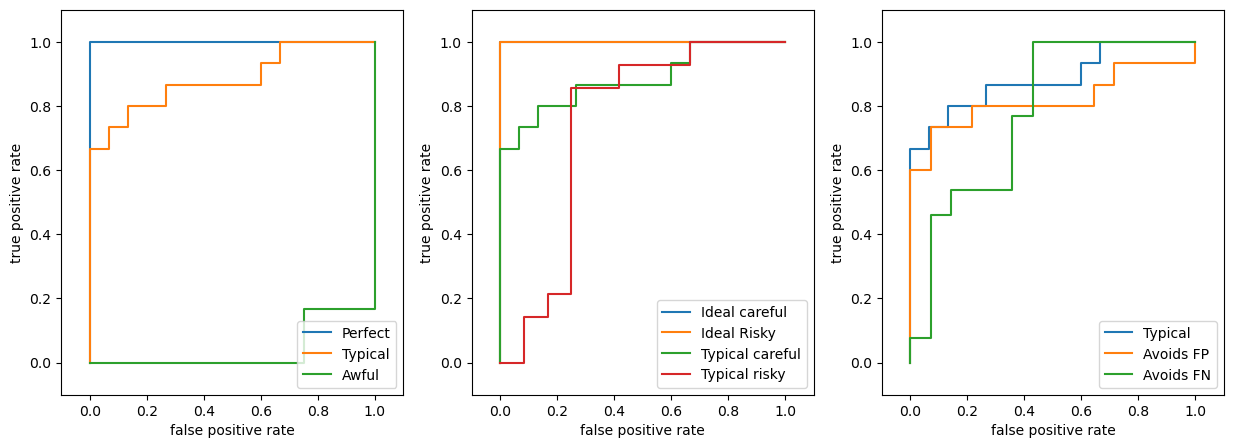

In [35]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
aucs = ""
for actual, predicted, descr in zip([actual_0, actual_1, actual_2], 
                                    [predicted_0, predicted_1, predicted_2],
                                    ["Perfect", "Typical", "Awful"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    plt.plot(fpr, tpr, label=descr)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " "
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.subplot(1, 3, 2)
for actual, predicted, descr in zip([actual_0, actual_0r, actual_1, actual_1r], 
                                    [predicted_0, predicted_0r, predicted_1, predicted_1r],
                                    ["Ideal careful", "Ideal Risky", "Typical careful", "Typical risky"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " "
    plt.plot(fpr, tpr, label=descr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.subplot(1, 3, 3)
for actual, predicted, descr in zip([actual_1, actual_10, actual_11], 
                                    [predicted_1, predicted_10, predicted_11], 
                                    ["Typical", "Avoids FP", "Avoids FN"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " "
    plt.plot(fpr, tpr, label=descr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])
print(aucs)

Чим більше об'єктів у вибірці, тим більш гладкою виглядає крива (хоча насправді вона все одно ступінчаста).

Як і очікувалося, криві всіх ідеальних алгоритмів проходять через лівий верхній кут. На першому графіку також показана типова ROC-крива (зазвичай на практиці вони не доходять до "ідеального" кута).

AUC ризикує алгоритму значному менше, ніж у обережного, хоча обережний і ріскущій ідеальні алгоритми не розрізняються по ROC або AUC. Тому прагнути збільшити зазор між інтервалами ймовірностей класів сенсу не має.

Спостерігається перекіс кривої в разі, коли алгоритму властиві помилки FP або FN. Однак за величиною AUC це відстежити неможливо (криві можуть бути симетричні щодо діагоналі (0, 1) - (1, 0)).

Після того, як крива побудована, зручно вибирати поріг бинаризации, в якому буде досягнуто компромісу між FP або FN. Поріг відповідає точці на кривій. Якщо ми хочемо уникнути помилок FP, потрібно вибирати точку на лівій стороні квадрата (як можна вище), якщо FN - точку на верхній стороні квадрата (як можна лівіше). Всі проміжні точки будуть відповідати різним пропорціям FP і FN.

__<font color="green" size=5>Programming assignment: problem 4. </font>__ На кожній кривій знайдіть точку, яка є найближчою до лівого верхнього кута (ближче в сенсі звичайного евклидова відстані), цій точці відповідає певний поріг бинаризации. Запишіть у вихідний файл пороги в наступному порядку:

T_0 T_1 T_2 T_0r T_1r T_10 T_11

Цифри XXX після пропуску відповідають таким же цифрам в назвах змінних actual_XXX і predicted_XXX.

Якщо порогів, які мінімізують відстань, кілька, виберіть __наібольшій__.

Передайте відповідь в функцію write_answer_4. 

Пояснення: функція roc_curve повертає три значення: FPR (масив абсціі точок ROC-кривої), TPR (масив ординат точок ROC-кривої) і thresholds (масив порогів, відповідних точкам).

Рекомендуємо малювати знайдену точку на графіку за допомогою функції plt.scatter.

In [36]:
############### Programming assignment: problem 4 ###############

In [37]:
def find_T_for_min_dest(actual_, predicted_, XXX):
    dest = 0
    fpr_, tpr_, thr_= roc_curve(actual_, predicted_)
    
    # Функція roc_curve повертає три значення: 
    # FPR (масив абсціі точок ROC-кривої), TPR (масив ординат точок ROC-кривої)
    # thresholds (масив порогів, відповідних точкам).
    
    # Евклідова відстань
    # dest = sqrt( (x1-x2)^2 + (y1-y2)^2 ), лівий верхній кут (x2, y2) = [0, 1]
    
    dest = (fpr_-0)**2 + (tpr_-1)**2 
    dest = (dest)**(0.5)
    
    argmin_dest = np.argmin(dest) # коефіцієнт мінім елемента в масиві відстаней
    print("_",XXX,": " "T =", thr_[argmin_dest]) # відповідний мін відстані поріг
    print("argmin_dest =", argmin_dest)
    print("fpr_, tpr_ =" , fpr_[argmin_dest], tpr_[argmin_dest], "\n")
    
    plt.scatter(fpr_[argmin_dest], tpr_[argmin_dest])
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.axis([-0.1, 1.1, -0.1, 1.1])
    
    return thr_[argmin_dest]

_ 0 : T = 0.60272784
argmin_dest = 2
fpr_, tpr_ = 0.0 1.0 

_ 1 : T = 0.53818659
argmin_dest = 6
fpr_, tpr_ = 0.13333333333333333 0.8 

_ 2 : T = 1.94843878
argmin_dest = 0
fpr_, tpr_ = 0.0 0.0 

_ 0r : T = 0.72007506
argmin_dest = 2
fpr_, tpr_ = 0.0 1.0 

_ 1r : T = 0.67371118
argmin_dest = 6
fpr_, tpr_ = 0.25 0.8571428571428571 

_ 10 : T = 0.39478755
argmin_dest = 4
fpr_, tpr_ = 0.07142857142857142 0.7333333333333333 

_ 11 : T = 0.70044585
argmin_dest = 7
fpr_, tpr_ = 0.35714285714285715 0.7692307692307693 



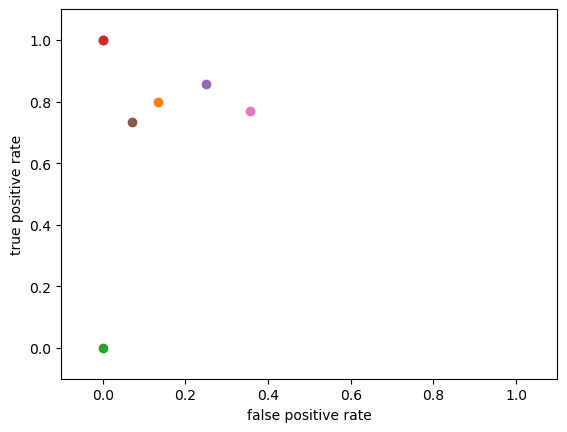

In [38]:
T_0  = find_T_for_min_dest(actual_0, predicted_0, 0)
T_1  = find_T_for_min_dest(actual_1, predicted_1, 1)
T_2  = find_T_for_min_dest(actual_2, predicted_2, 2)
T_0r = find_T_for_min_dest(actual_0r, predicted_0r, "0r")
T_1r = find_T_for_min_dest(actual_1r, predicted_1r, "1r")
T_10 = find_T_for_min_dest(actual_10, predicted_10, 10)
T_11 = find_T_for_min_dest(actual_11, predicted_11, 11)

In [39]:
def write_answer_4(T_0, T_1, T_2, T_0r, T_1r, T_10, T_11):
    answers = [T_0, T_1, T_2, T_0r, T_1r, T_10, T_11]
    with open("pa_metrics_problem4.txt", "w") as fout:
        fout.writelines(" ".join([str(num) for num in answers])+'\n')
        fout.writelines('сума чисел: '+ str(round(sum(answers),5)))
        print(answers)
        print('сума чисел: '+ str(round(sum(answers),5)))        

write_answer_4(T_0, T_1, T_2, T_0r, T_1r, T_10, T_11)

[0.60272784, 0.53818659, 1.94843878, 0.72007506, 0.67371118, 0.39478755, 0.70044585]
сума чисел: 5.57837


На зразок roc_curve, будують також precision-recall curve і шукають площа під нею.

### Висновок

Ми розглянули кілька метрик бінарної класифікації. Деякі з них, наприклад, log_loss, узагальнюються на багатоклосовій  випадок. Якщо метрику складно узагальнити у вигляді формули, завдання многоклассовой класифікації розглядають як сукупність завдань бінарної класифікації і потім спеціальними методами усредняют метрику (наприклад, micro і macro averaging).

На практиці завжди корисно візуалізувати вектори, які видає ваш алгоритм, щоб розуміти, які він робить помилки при різних порогах і як метрика реагує на які видаються вектори пророкувань.